# [Bucket Brigade 17198](https://www.acmicpc.net/problem/17198)

In [72]:
import sys

with open('./bj.txt', 'w') as f:
    f.write('''..........
..........
..........
..B.......
..........
.....R....
..........
..........
.....L....
..........''')

sys.stdin = open('./bj.txt', 'r')
input = sys.stdin.readline

In [73]:
r, c = 10, 10

graph = [list(map(str, input().strip())) for _ in range(r)]
visited = [[False] * c for _ in range(r)]

In [68]:
graph
# B -> L 까지의 최소 거리 구하기.
# L -> B 까지의 최소 거리 구하기

# B 와 L이 존재하는 사각형 구하기
# 1. 필요 없는 row, colum 날리기
# 2. 상 하 좌 우를 더하면서 장외를 넘는지 R의 존재 여부 확인

# 변수
# int cnt
# graph

[['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', 'B', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', 'R', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', 'L', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']]

### 방법론
1. 그래프에서 B 찾기.  
2. 현재 위치 0으로 설정
3. queue 만들기.
4. queue 안에 내용물 존재할 때까지 반복.
5. popleft로 빼내기.
6. for loop로 상하좌우 각각 현재 위치에 더하기
7. 다음 위치가 '.' 이라면 queue 안에 다음 위치 넣기.
8. 다음 위치 = 현재 위치 + 1
9. 다음 위치가 'L'이라면 현재 위치의 값을 출력

### 변수

- graph
- dx, dy
- queue

In [65]:
################
# 34096KB	68ms
################

import sys
from collections import deque

input = sys.stdin.readline
r, c = 10, 10
graph = [list(map(str, input().strip())) for _ in range(r)]

def solution(x, y):
    dx = [0,1,0,-1]
    dy = [1,0,-1,0]

    queue = deque()
    queue.append((x, y))
    graph[x][y] = 0
    while queue:
        x, y = queue.popleft()
        for i in range(len(dx)):
            nx = x + dx[i]
            ny = y + dy[i]
            if (r > nx >= 0):
                if graph[nx][y] == 'L': # 현재 위치 == 'L'
                    return graph[x][y] # 이전 위치 output

                if graph[nx][y] == '.':
                    queue.append((nx, y))
                    graph[nx][y] = graph[x][y] +1 # 현재 위치 = 이전 위치 + 1

            if (c > ny >= 0):
                if graph[x][ny] == 'L':
                    return graph[x][y]

                if graph[x][ny] == '.':
                    queue.append((x, ny))
                    graph[x][ny] = graph[x][y] +1

for x in range(r):
    for y in range(c):
        if graph[x][y] == 'B':
            result = solution(x, y)
print(result)

7


In [ ]:
# row, column = 5, 5 예시

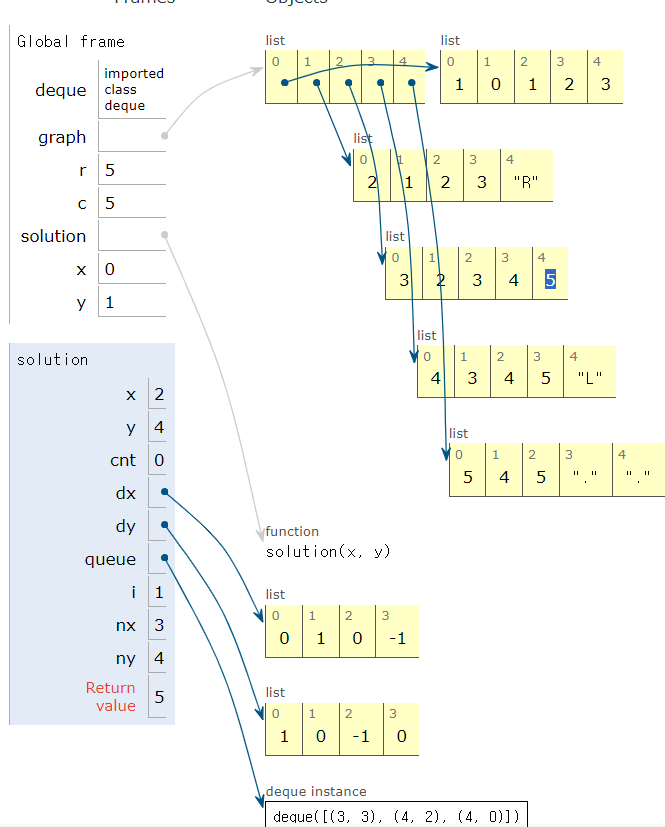

In [74]:
#########################################
# 실패, 그래프를 삭제하면서 하는 것은 비추.
# 약 50% 정확도.
#########################################

import sys
from collections import deque

input = sys.stdin.readline
r, c = 10, 10
graph = [list(map(str, input().strip())) for _ in range(r)]

height = []

for i in range(len(graph)):
    if 'B' in graph[i] or 'L' in graph[i]:
        height.append(i)
# [3, 8]

max_height_minus = len(graph) -1 - max(height)

queue = deque(graph)
# deque([['.', '.', 'B', '.', '.', '.', '.', '.', '.', '.'],
#        ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
#        ['.', '.', '.', '.', '.', 'R', '.', '.', '.', '.'],
#        ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
#        ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
#        ['.', '.', '.', '.', '.', 'L', '.', '.', '.', '.']])

if min(height) > 0:
    for _ in range(min(height)):
        queue.popleft() # 앞 줄 삭제

if max_height_minus > 0:
    for _ in range(max_height_minus):
        queue.pop() # 뒷 줄 삭제

r, c = len(queue), len(queue[0])
# (6, 10)

def solution(x, y):
    cnt = 0
    dx = [0,1,0,-1]
    dy = [1,0,-1,0]

    q = deque()
    q.append((x, y))
    queue[x][y] = 0
    while q:
        x, y = q.popleft()
        for i in range(len(dx)):
            nx = x + dx[i]
            ny = y + dy[i]
            if (r > nx >= 0):
                if queue[nx][y] == 'L':
                    return queue[x][y]

                if queue[nx][y] == '.':
                    q.append((nx, y))
                    queue[nx][y] = queue[x][y] +1

            if (c > ny >= 0):
                if queue[x][ny] == 'L':
                    return queue[x][y]

                if queue[x][ny] == '.':
                    q.append((x, ny))
                    queue[x][ny] = queue[x][y] +1


for x in range(r):
    for y in range(c):
        if queue[x][y] == 'B':
            result = solution(x, y)

print(result)

7
